# Spotify Features

### Source : https://www.kaggle.com/zaheenhamidani/ultimate-spotify-tracks-db

### The dataset tells you about several attributes of a particular song.
#### There are 18 columns and about 288,000 songs

 ### Column Names with descriptions:
- #### popularity - A measure that tells number of times the song is played.
- #### track_name - Name of the song
- #### genre - The genre that song belongs to.
- #### artist_name - Name of the artist of the song.
-  #### acousticness - A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
- #### danceability - Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
- #### duration_ms - The duration of the track in milliseconds.
- #### energy - Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
- #### track_id - The Spotify ID for the track.
- #### instrumentalness - Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
- #### key - The key the track is in. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.
- #### mode - Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
- #### liveness - Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
- #### loudness - The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.
- #### speechiness - Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
- #### tempo - The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
- #### time_signature - An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).
- #### valence - A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

## Questions :

### 1. What factors have the most effect on the valence of a given song?
### 2. How do these factors effect the valence?

## Answers:
### 1. All the attributes given have a role to play in calculation of valence. But, Tempo and Energy are the two which highly effect a given song.
### 2. Tempo is inversely proportional to valence of a song while a song with more energy has more valence.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("SpotifyFeatures.csv")
df.columns

Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')

In [3]:
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Opera,Giuseppe Verdi,"Stiffelio, Act III: Ei fugge! … Lina, pensai c...",7EsKYeHtTc4H4xWiTqSVZA,21,0.986,0.313,490867,0.23100,0.000431,C#,0.0964,-14.287,Major,0.0547,86.001,4/4,0.0886
1,Opera,Giacomo Puccini,Madama Butterfly / Act 1: ... E soffitto e pareti,7MfmRBvqaW0I6UTxXnad8p,18,0.972,0.360,176797,0.20100,0.028000,D#,0.1330,-19.794,Major,0.0581,131.798,4/4,0.3690
2,Opera,Giacomo Puccini,"Turandot / Act 2: Gloria, gloria, o vincitore",7pBo1GDhIysyUMFXiDVoON,10,0.935,0.168,266184,0.47000,0.020400,C,0.3630,-8.415,Major,0.0383,75.126,3/4,0.0696
3,Opera,Giuseppe Verdi,"Rigoletto, Act IV: Venti scudi hai tu detto?",02mvYZX5aKNzdqEo6jF20m,17,0.961,0.250,288573,0.00605,0.000000,D,0.1200,-33.440,Major,0.0480,76.493,4/4,0.0380
4,Opera,Giuseppe Verdi,"Don Carlo / Act 4: ""Ella giammai m'amò!""",03TW0jwGMGhUabAjOpB1T9,19,0.985,0.142,629760,0.05800,0.146000,D,0.0969,-23.625,Major,0.0493,172.935,4/4,0.0382


In [4]:
df.shape

(228159, 18)

In [5]:
df = df.drop(['artist_name','track_name','track_id'], axis = 1 )

#to scale down
df.duration_ms = df.duration_ms / 60000

df.columns = ['genre', 'popularity', 'acousticness',
       'danceability', 'duration_min', 'energy', 'instrumentalness','key', 'liveness',
       'loudness', 'mode', 'speechiness', 'tempo', 'time_signature',
       'valence']

In [6]:
df.describe()

,popularity,acousticness,danceability,duration_min,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000
mean,44.209130,0.351200,0.554198,3.943487,0.580967,0.137310,0.214638,-9.354658,0.122442,117.423062,0.444795
std,17.276599,0.351385,0.183949,1.944645,0.260577,0.292447,0.196977,5.940994,0.186264,30.712458,0.255397
min,0.000000,0.000001,0.056900,0.258483,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,33.000000,0.030900,0.437000,3.104217,0.405000,0.000000,0.097700,-11.287000,0.036800,92.734000,0.232000
50%,47.000000,0.205000,0.570000,3.686217,0.618000,0.000037,0.128000,-7.515000,0.050600,115.347000,0.430000
75%,57.000000,0.689000,0.690000,4.414000,0.793000,0.023400,0.263000,-5.415000,0.109000,138.887000,0.643000
max,100.000000,0.996000,0.987000,92.548617,0.999000,0.999000,1.000000,1.585000,0.967000,239.848000,1.000000


##### Check for Null values

In [7]:
df.isna().sum()

genre               0
popularity          0
acousticness        0
danceability        0
duration_min        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

##### Check for missing values

In [8]:
df.count()

genre               228159
popularity          228159
acousticness        228159
danceability        228159
duration_min        228159
energy              228159
instrumentalness    228159
key                 228159
liveness            228159
loudness            228159
mode                228159
speechiness         228159
tempo               228159
time_signature      228159
valence             228159
dtype: int64

##### Check the datatypes of each of the attributes

In [9]:
df.dtypes

genre                object
popularity            int64
acousticness        float64
danceability        float64
duration_min        float64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo               float64
time_signature       object
valence             float64
dtype: object

There are no null or missing values to take care of

##### Just plotting the data as a whole

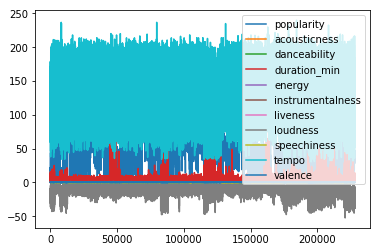

In [10]:
df.plot()

##### Scaling down 'tempo' and plotting again

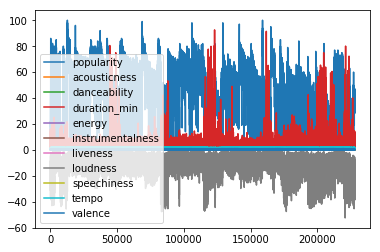

In [11]:
df.tempo = df.tempo / 100
df.plot()

#### Let us check the frequencies of each of the attributes by plotting histograms. Just to know how the attributes are distributed.

(array([  3.00000000e+00,   4.00000000e+00,   1.30000000e+01,
          2.20000000e+01,   2.00000000e+01,   1.40000000e+01,
          1.50000000e+01,   9.00000000e+00,   2.00000000e+01,
          2.80000000e+01,   5.00000000e+01,   6.30000000e+01,
          7.50000000e+01,   9.50000000e+01,   1.18000000e+02,
          9.70000000e+01,   1.15000000e+02,   1.61000000e+02,
          2.22000000e+02,   3.81000000e+02,   4.06000000e+02,
          5.62000000e+02,   5.58000000e+02,   7.66000000e+02,
          1.03300000e+03,   8.52000000e+02,   1.06500000e+03,
          1.31500000e+03,   1.79300000e+03,   3.05900000e+03,
          3.26600000e+03,   3.37700000e+03,   4.88800000e+03,
          3.63000000e+03,   4.43400000e+03,   3.33100000e+03,
          3.65600000e+03,   2.90200000e+03,   3.66500000e+03,
          5.01400000e+03,   4.85200000e+03,   3.63300000e+03,
          6.23700000e+03,   4.02700000e+03,   4.69200000e+03,
          2.47900000e+03,   5.76100000e+03,   2.88900000e+03,
        

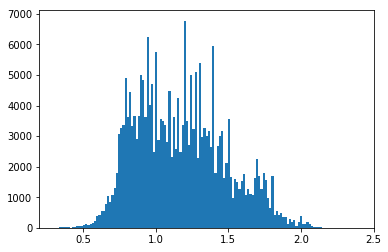

In [12]:
plt.hist(df.tempo, bins = 'auto')

(array([  3.31400000e+03,   7.47000000e+02,   6.18000000e+02,
          6.26000000e+02,   0.00000000e+00,   6.56000000e+02,
          7.98000000e+02,   7.09000000e+02,   6.88000000e+02,
          0.00000000e+00,   7.87000000e+02,   8.59000000e+02,
          1.09500000e+03,   0.00000000e+00,   1.23800000e+03,
          1.29700000e+03,   1.28700000e+03,   1.19500000e+03,
          0.00000000e+00,   1.27200000e+03,   1.15500000e+03,
          1.23900000e+03,   0.00000000e+00,   1.21600000e+03,
          1.42100000e+03,   1.52500000e+03,   1.73800000e+03,
          0.00000000e+00,   1.93300000e+03,   2.11700000e+03,
          2.27300000e+03,   0.00000000e+00,   2.46300000e+03,
          2.49700000e+03,   2.69400000e+03,   3.10500000e+03,
          0.00000000e+00,   3.15800000e+03,   3.17500000e+03,
          3.19700000e+03,   3.36700000e+03,   0.00000000e+00,
          3.47600000e+03,   3.34500000e+03,   3.54800000e+03,
          0.00000000e+00,   3.68300000e+03,   3.61400000e+03,
        

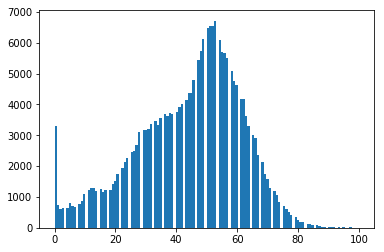

In [13]:
plt.hist(df.popularity, bins = 'auto')

(array([ 1722.,  1736.,  1907.,  1721.,  1706.,  1596.,  1631.,  1613.,
         1460.,  1723.,  1717.,  1511.,  1622.,  1500.,  1528.,  1652.,
         1370.,  1600.,  1608.,  1466.,  1780.,  1835.,  1596.,  1959.,
         2057.,  1916.,  2244.,  1908.,  2092.,  2325.,  2347.,  2487.,
         2735.,  2437.,  2808.,  3334.,  2973.,  3338.,  3528.,  3210.,
         3283.,  3835.,  3526.,  3765.,  3883.,  3681.,  3975.,  3422.,
         3870.,  4218.,  3753.,  4232.,  4445.,  4055.,  4393.,  4277.,
         4126.,  4529.,  4279.,  3754.,  3893.,  3766.,  3775.,  4282.,
         3763.,  4148.,  4119.,  3731.,  3985.,  4065.,  3586.,  3732.,
         3520.,  3251.,  3667.,  3183.,  2708.,  2697.,  1689.]),
 array([  2.03000000e-05,   1.26656127e-02,   2.53109253e-02,
          3.79562380e-02,   5.06015506e-02,   6.32468633e-02,
          7.58921759e-02,   8.85374886e-02,   1.01182801e-01,
          1.13828114e-01,   1.26473427e-01,   1.39118739e-01,
          1.51764052e-01,   1.64409365

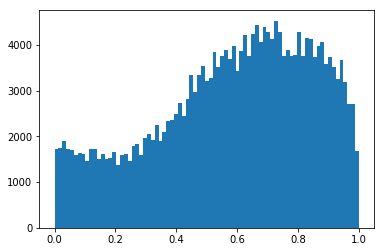

In [14]:
plt.hist(df.energy, bins = 'auto')

(array([  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   2.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   2.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          2.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          2.00000000e+00,   3.00000000e+00,   0.00000000e+00,
          2.00000000e+00,   3.00000000e+00,   0.00000000e+00,
          4.00000000e+00,   5.00000000e+00,   1.00000000e+00,
          5.00000000e+00,   0.00000000e+00,   2.00000000e+00,
        

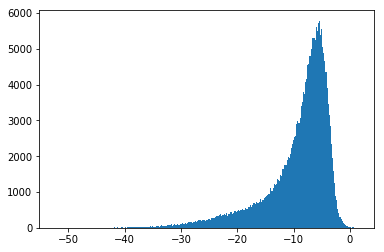

In [15]:
plt.hist(df.loudness, bins = 'auto')

(array([  331.,   391.,   396.,   446.,   375.,   396.,   354.,   414.,
          458.,   607.,   676.,   745.,   807.,  1052.,   873.,   843.,
          953.,   986.,   987.,   979.,   973.,   961.,  1203.,  1139.,
         1084.,  1149.,  1358.,  1195.,  1302.,  1257.,  1524.,  1487.,
         1587.,  1593.,  1582.,  1784.,  1661.,  1854.,  1940.,  2210.,
         2147.,  2305.,  2215.,  2734.,  2554.,  2618.,  2644.,  2877.,
         3223.,  2989.,  3124.,  3210.,  3842.,  3373.,  3616.,  3560.,
         4155.,  3775.,  3723.,  4018.,  3887.,  4237.,  3878.,  3973.,
         3791.,  4521.,  3838.,  3808.,  3996.,  4334.,  3877.,  3674.,
         3880.,  3580.,  4188.,  3686.,  3626.,  3419.,  3861.,  3431.,
         3181.,  2931.,  3286.,  2786.,  2758.,  2644.,  2576.,  2679.,
         2334.,  2269.,  2116.,  1981.,  1640.,  1669.,  1460.,  1479.,
         1269.,  1059.,   927.,   932.,   862.,   603.,   607.,   443.,
          450.,   331.,   241.,   202.,   132.,    98.,    70., 

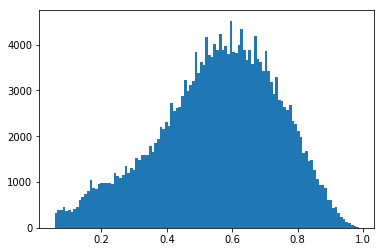

In [16]:
plt.hist(df.danceability, bins = 'auto')

(array([   23.,   128.,  8801.,  2698.,  3201.,  3724.,  2650.,  2843.,
         3542.,  2941.,  3206.,  3597.,  3601.,  3594.,  3737.,  3750.,
         3490.,  3919.,  3212.,  3237.,  3609.,  3891.,  3641.,  3632.,
         4352.,  4002.,  4628.,  3949.,  3935.,  3992.,  3838.,  3644.,
         3620.,  3825.,  3333.,  3668.,  3880.,  3836.,  3639.,  4042.,
         3640.,  3709.,  3798.,  3226.,  3714.,  3075.,  3146.,  3034.,
         3393.,  3076.,  2931.,  3192.,  2861.,  3031.,  2674.,  2535.,
         2427.,  2747.,  2517.,  2219.,  2381.,  2277.,  1964.,  1940.,
         1852.,  1759.,  2076.,  1683.,  1395.,  1627.,  1338.,  1194.,
         2594.,   270.,    14.]),
 array([ 0.        ,  0.01333333,  0.02666667,  0.04      ,  0.05333333,
         0.06666667,  0.08      ,  0.09333333,  0.10666667,  0.12      ,
         0.13333333,  0.14666667,  0.16      ,  0.17333333,  0.18666667,
         0.2       ,  0.21333333,  0.22666667,  0.24      ,  0.25333333,
         0.26666667,  0.28

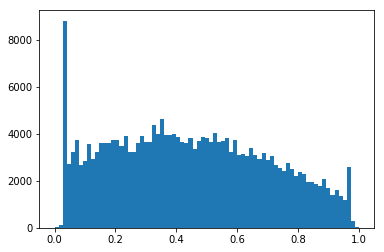

In [17]:
plt.hist(df.valence, bins = 'auto')

(array([ 49232.,  14822.,  10577.,   8221.,   6814.,   6416.,   5571.,
          4882.,   4660.,   4190.,   4074.,   3576.,   3360.,   3157.,
          2949.,   2969.,   2676.,   2616.,   2333.,   2272.,   2403.,
          2113.,   2237.,   1962.,   2034.,   2003.,   1912.,   2039.,
          1900.,   1949.,   2069.,   2142.,   2051.,   2254.,   2498.,
          2502.,   2830.,   3079.,   3054.,   3333.,   3474.,   3731.,
          3739.,   3949.,   4601.,   6736.,  10198.]),
 array([  1.00000000e-06,   2.11924681e-02,   4.23839362e-02,
          6.35754043e-02,   8.47668723e-02,   1.05958340e-01,
          1.27149809e-01,   1.48341277e-01,   1.69532745e-01,
          1.90724213e-01,   2.11915681e-01,   2.33107149e-01,
          2.54298617e-01,   2.75490085e-01,   2.96681553e-01,
          3.17873021e-01,   3.39064489e-01,   3.60255957e-01,
          3.81447426e-01,   4.02638894e-01,   4.23830362e-01,
          4.45021830e-01,   4.66213298e-01,   4.87404766e-01,
          5.08596234e-0

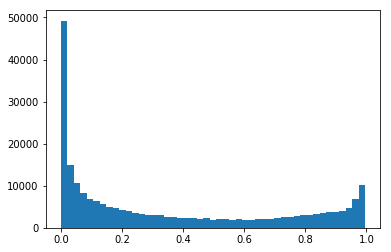

In [18]:
plt.hist(df.acousticness, bins = 'auto')

(array([ 13.,  12.,  20., ...,   0.,   0.,   1.]),
 array([  0.25848333,   0.30134916,   0.34421499, ...,  92.46288501,
         92.50575084,  92.54861667]),
 <a list of 2153 Patch objects>)

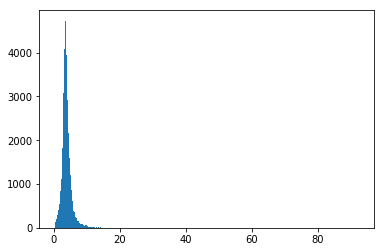

In [19]:
plt.hist(df.duration_min, bins = 'auto')

#### From the frequency distributions it seems that tempo and energy are the most contributing factors for valence

### Isolating tempo, energy and valence

In [22]:
df1 = pd.DataFrame()
df1['tempo'] = df.tempo
df1['energy'] = df.energy
df1['valence'] = df.valence
df1.head()

,tempo,energy,valence
0,0.86001,0.23100,0.0886
1,1.31798,0.20100,0.3690
2,0.75126,0.47000,0.0696
3,0.76493,0.00605,0.0380
4,1.72935,0.05800,0.0382


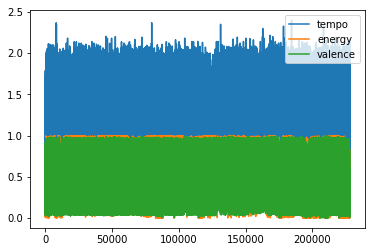

In [25]:
df1.plot()

### By this we know that songs with higher energy value and lower tempo contribute to high valence. In other words a song with lowest bpm or pace and highest energy (probably voice pitch which is not included in the features) are indicated to be the most happiest song.